In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('all_data.csv')

column_mapper = {'Country': 'country', "Year": 'year', "Life expectancy at birth (years)": 'life_expectancy', 'GDP': 'gdp'}

data.rename(columns = column_mapper, inplace = True)

data.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [22]:
#data.country.unique()
data.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [12]:
data.groupby('country').life_expectancy.mean()

country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_expectancy, dtype: float64

In [14]:
data.groupby('country').gdp.mean()

country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: gdp, dtype: float64

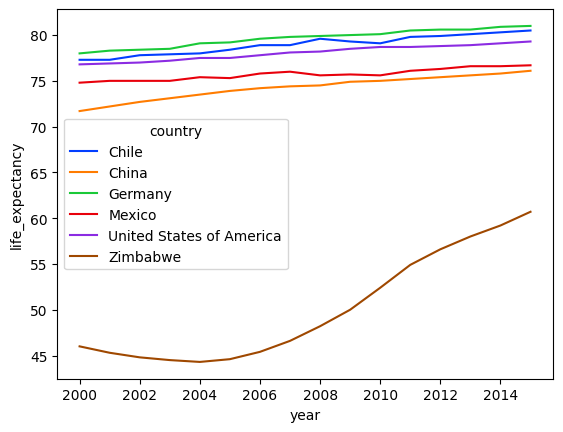

In [26]:
sns.lineplot(data = data, x = 'year', y = 'life_expectancy', hue = 'country', palette = 'bright')
plt.show()

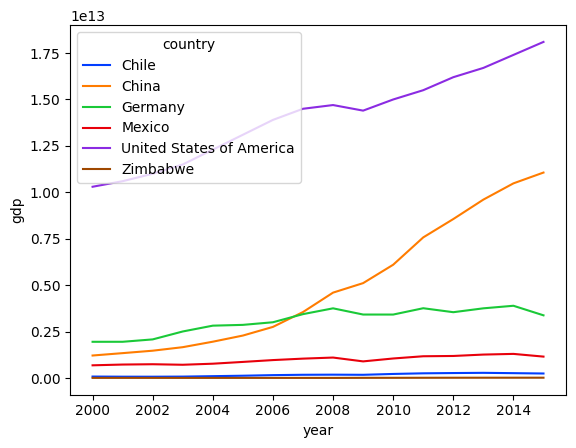

In [27]:
sns.lineplot(data = data, x = 'year', y = 'gdp', hue = 'country', palette = 'bright')
plt.show()

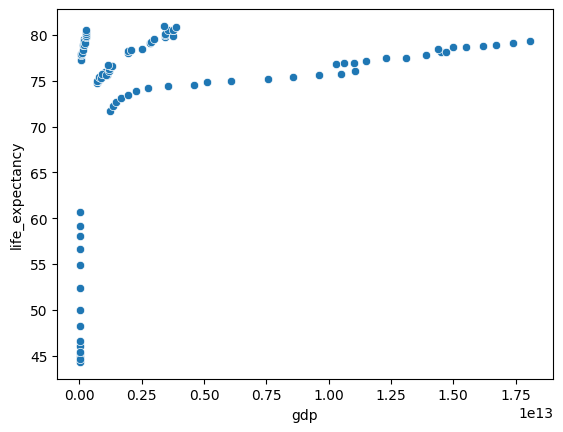

In [28]:
sns.scatterplot(data = data, x = 'gdp', y = 'life_expectancy')
plt.show()

In [32]:
data.groupby('country').life_expectancy.mean()

country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_expectancy, dtype: float64

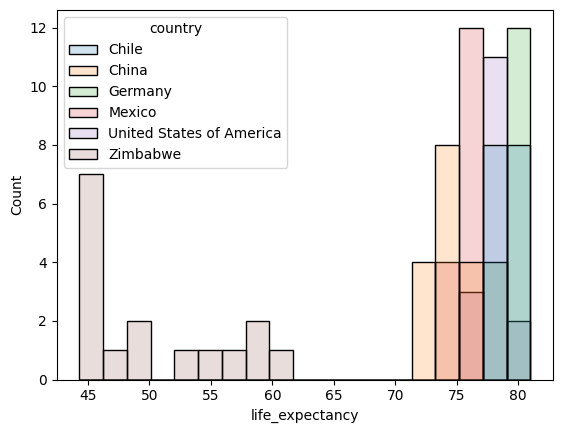

In [31]:
sns.histplot(data = data, x = 'life_expectancy', hue = 'country', alpha = 0.2)
plt.show()